In [37]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [9]:
years = 5
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

In [11]:
tickers = ['SPY','BND','GLD','QQQ','VTI']

In [12]:
adj_close = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker,start = startDate,end = endDate)
    adj_close[ticker] = data['Adj Close']

print(adj_close)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                   SPY        BND         GLD         QQQ         VTI
Date                                                                 
2018-10-08  264.774445  68.428314  112.540001  173.193771  135.725586
2018-10-09  264.388092  68.560349  112.599998  173.754807  135.486343
2018-10-10  256.016724  68.507561  112.879997  166.113159  131.171387
2018-10-11  250.377609  68.701172  115.779999  164.052856  128.374359
2018-10-12  253.854858  68.683609  115.230003  168.618500  130.067291
...                ...        ...         ...         ...         ...
2023-10-02  427.309998  69.110001  169.649994  361.260010  212.130005
2023-10-03  421.589996  6

In [13]:
log_returns = np.log(adj_close/adj_close.shift(1))
log_returns = log_returns.dropna()

print(log_returns)

                 SPY       BND       GLD       QQQ       VTI
Date                                                        
2018-10-09 -0.001460  0.001928  0.000533  0.003234 -0.001764
2018-10-10 -0.032175 -0.000770  0.002484 -0.044976 -0.032366
2018-10-11 -0.022273  0.002822  0.025367 -0.012481 -0.021554
2018-10-12  0.013792 -0.000256 -0.004762  0.027450  0.013101
2018-10-15 -0.005633 -0.000257  0.006660 -0.012178 -0.004466
...              ...       ...       ...       ...       ...
2023-10-02 -0.000398 -0.006893 -0.010554  0.008311 -0.001319
2023-10-03 -0.013476 -0.008136 -0.002892 -0.017705 -0.014626
2023-10-04  0.007256  0.006543 -0.000118  0.013517  0.007197
2023-10-05 -0.000377  0.000724 -0.001834 -0.002951 -0.000523
2023-10-06  0.008912 -0.003482  0.006730  0.012082  0.009294

[1257 rows x 5 columns]


In [14]:
def expected_return(weights,log_returns):
    return np.sum(log_returns.mean()*weights)

In [15]:
def standard_dev (weights,cov_matrix):
    variance = weights.T @cov_matrix @weights 
    return np.sqrt(variance)

In [16]:
cov_matrix = log_returns.cov()
print(cov_matrix)

          SPY       BND       GLD       QQQ       VTI
SPY  0.000185  0.000010  0.000012  0.000211  0.000189
BND  0.000010  0.000017  0.000014  0.000012  0.000010
GLD  0.000012  0.000014  0.000086  0.000018  0.000013
QQQ  0.000211  0.000012  0.000018  0.000275  0.000215
VTI  0.000189  0.000010  0.000013  0.000215  0.000194


In [17]:
portofolio_value = 100000
weights = np.array([1/len(tickers)]*len(tickers))
portofolo_expected_return = expected_return(weights,log_returns)
portofolio_std_dev = standard_dev(weights,cov_matrix)

In [18]:
def random_z_score():
    return np.random.normal(0,1)

In [32]:
days = 20
def scenario_gain_loss(portofolio_value,portofolio_std_dev,z_score,days):
    return portofolio_value * portofolo_expected_return * days +portofolio_value * portofolio_std_dev *z_score *np.sqrt(days)


In [33]:
simulations = 10000
scenarioReturn = []

for i in range(simulations):
    z_score =random_z_score()
    scenarioReturn.append(scenario_gain_loss(portofolio_value,portofolio_std_dev,z_score,days))

In [34]:
confidence_interval = .99
VaR = -np.percentile(scenarioReturn, 100*(1-confidence_interval))
print(VaR)

9129.313493589076


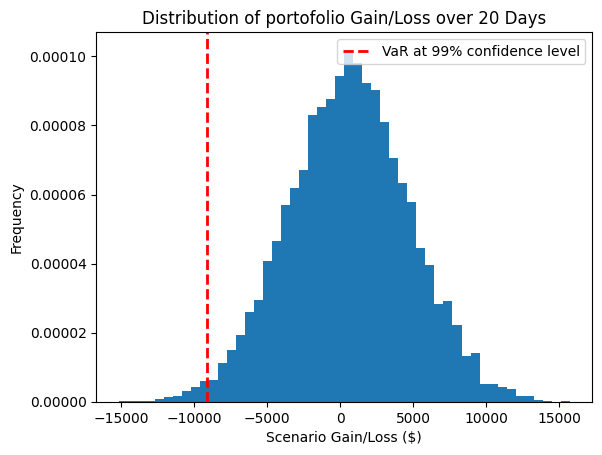

In [38]:
plt.hist(scenarioReturn,bins=50,density=True)
plt.xlabel('Scenario Gain/Loss ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of portofolio Gain/Loss over {days} Days')
plt.axvline(-VaR, color='r',linestyle='dashed',linewidth=2,label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.show()